In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot') # adjusts the style to emulate ggplot (a popular plotting package for R)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 1.5

In [6]:
def long_call(S, K, Price):
    # Long call payoff = max(Stock price - Strike price, 0)
    # Only exercise if the current stock price is GREATER than the strike price
    P = list(map(lambda x: max(x - K, 0) - Price, S))
    return P

In [7]:
def long_put(S, K, Price):
    # Long put payoff = max(Strike price - Stock price, 0)
    # Only exercise if the current stock price is LESS than the strike price
    P = list(map(lambda x: max(K - x, 0) - Price, S))
    return P

In [8]:
def short_call(S, K, Price):
    # Short call payoff is inverse of long call payoff
    P = long_call(S, K, Price)
    return [-1 * p for p in P]

In [9]:
def short_put(S, K, Price):
    # Short put payoff is inverse of long put payoff
    P = long_put(S, K, Price)
    return [-1 * p for p in P]

In [10]:
def binary_call(S, K, Price):
    # Binary call payoff is:
    # Strike if Strike price > Stock price OR
    # 0
    P = list(map(lambda x: K - Price if x > K else 0 - Price, S))
    return P

In [14]:
def binary_put(S, K, Price):
    # Binary put payoff is:
    # Strike if Strike price < Stock price OR
    # 0
    P = list(map(lambda x: K - Price if x < K else 0 - Price, S))
    return P

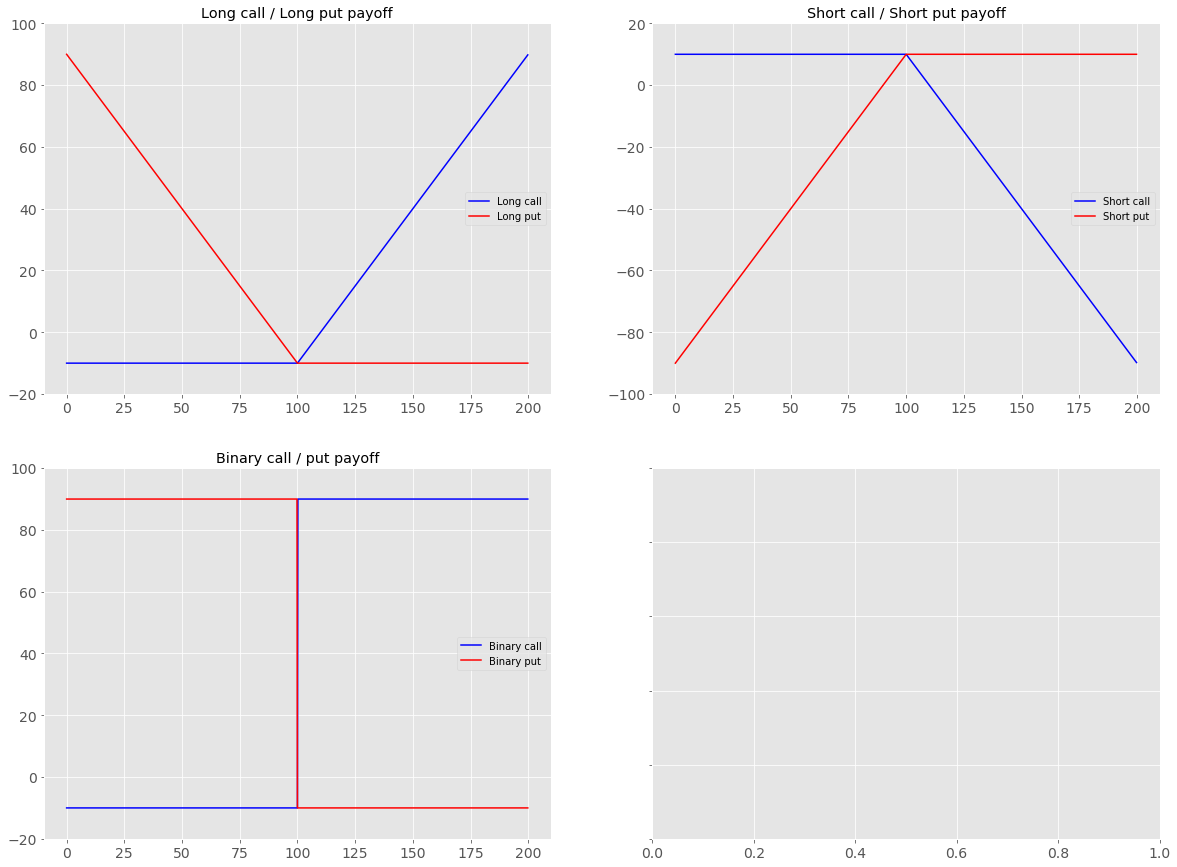

In [16]:
S = [t/5 for t in range(0,1000)]

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20,15))

plt.subplot(221)
long_c = long_call(S, 100, 10)
long_p = long_put(S, 100, 10)
plt.plot(S, long_c, 'b')
plt.plot(S, long_p, 'r')
plt.ylim(-20,100)
plt.legend(['Long call','Long put'])
plt.title('Long call / Long put payoff')

plt.subplot(222)
short_c = short_call(S, 100, 10)
short_p = short_put(S, 100, 10)
plt.plot(S, short_c, 'b')
plt.plot(S, short_p, 'r')
plt.ylim(-100,20)
plt.legend(['Short call','Short put'])
plt.title('Short call / Short put payoff')

plt.subplot(223)
bin_c = binary_call(S, 100, 10)
bin_p = binary_put(S, 100, 10)
plt.plot(S, bin_c, 'b')
plt.plot(S, bin_p, 'r')
plt.ylim(-20,100)
plt.legend(['Binary call','Binary put'])
plt.title('Binary call / put payoff')


plt.show()
